---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.13 - Customer Churn

### Imports and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

sns.set()

In [2]:
URL = "https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(URL, sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
description = pd.read_excel(URL, sheet_name='Data Dict', header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

- Number of total observations: 5630
- Missing values in some columns.
- Object data type columns (categorical).

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


We have to predict `Churn` column, it will be `labels`(predictors) for us:

In [6]:
churn_rate = df['Churn'].value_counts() / len(df) * 100
churn_rate

0    83.161634
1    16.838366
Name: Churn, dtype: float64

- 4682 customers repurchased (remain)
- 948 customers left (churn)

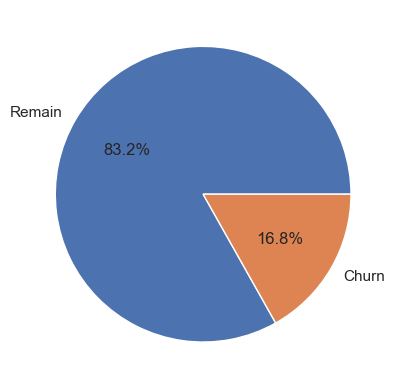

In [7]:
plt.pie(churn_rate, labels=['Remain', 'Churn'], autopct='%1.1f%%');

#### Analyzing some numeric columns

In [8]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

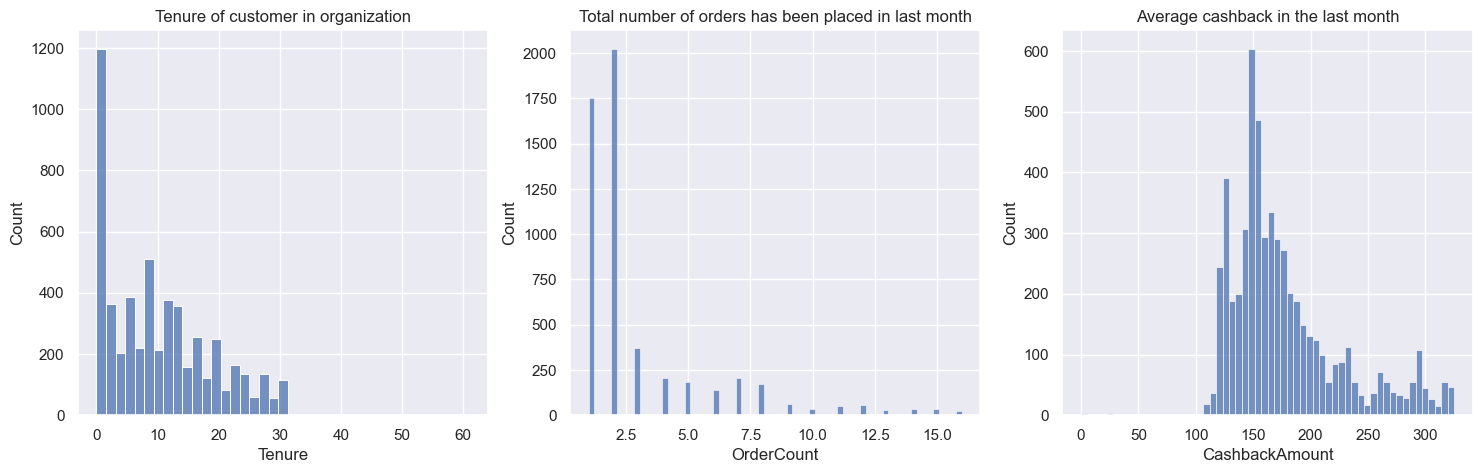

In [9]:
fig, axes = plt.subplots(1,3, figsize=[18, 5])

# Tenure
sns.histplot(x='Tenure', data=df, ax=axes[0])
axes[0].set_title("Tenure of customer in organization")

# OrderCount
sns.histplot(x='OrderCount', data=df, ax=axes[1])
axes[1].set_title("Total number of orders has been placed in last month")

# Cashback
sns.histplot(x='CashbackAmount', data=df, ax=axes[2])
axes[2].set_title("Average cashback in the last month")

plt.show()

#### Analyzing some categorical columns

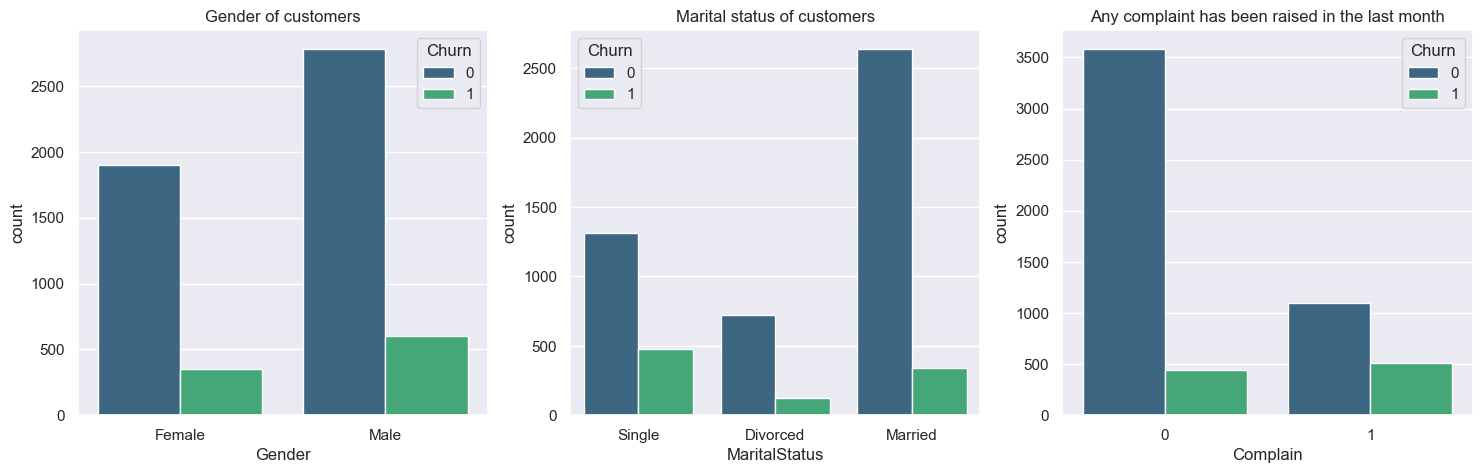

In [10]:
fig, axes = plt.subplots(1,3, figsize=[18, 5])

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender of customers")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Marital status of customers")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Any complaint has been raised in the last month")

plt.show()

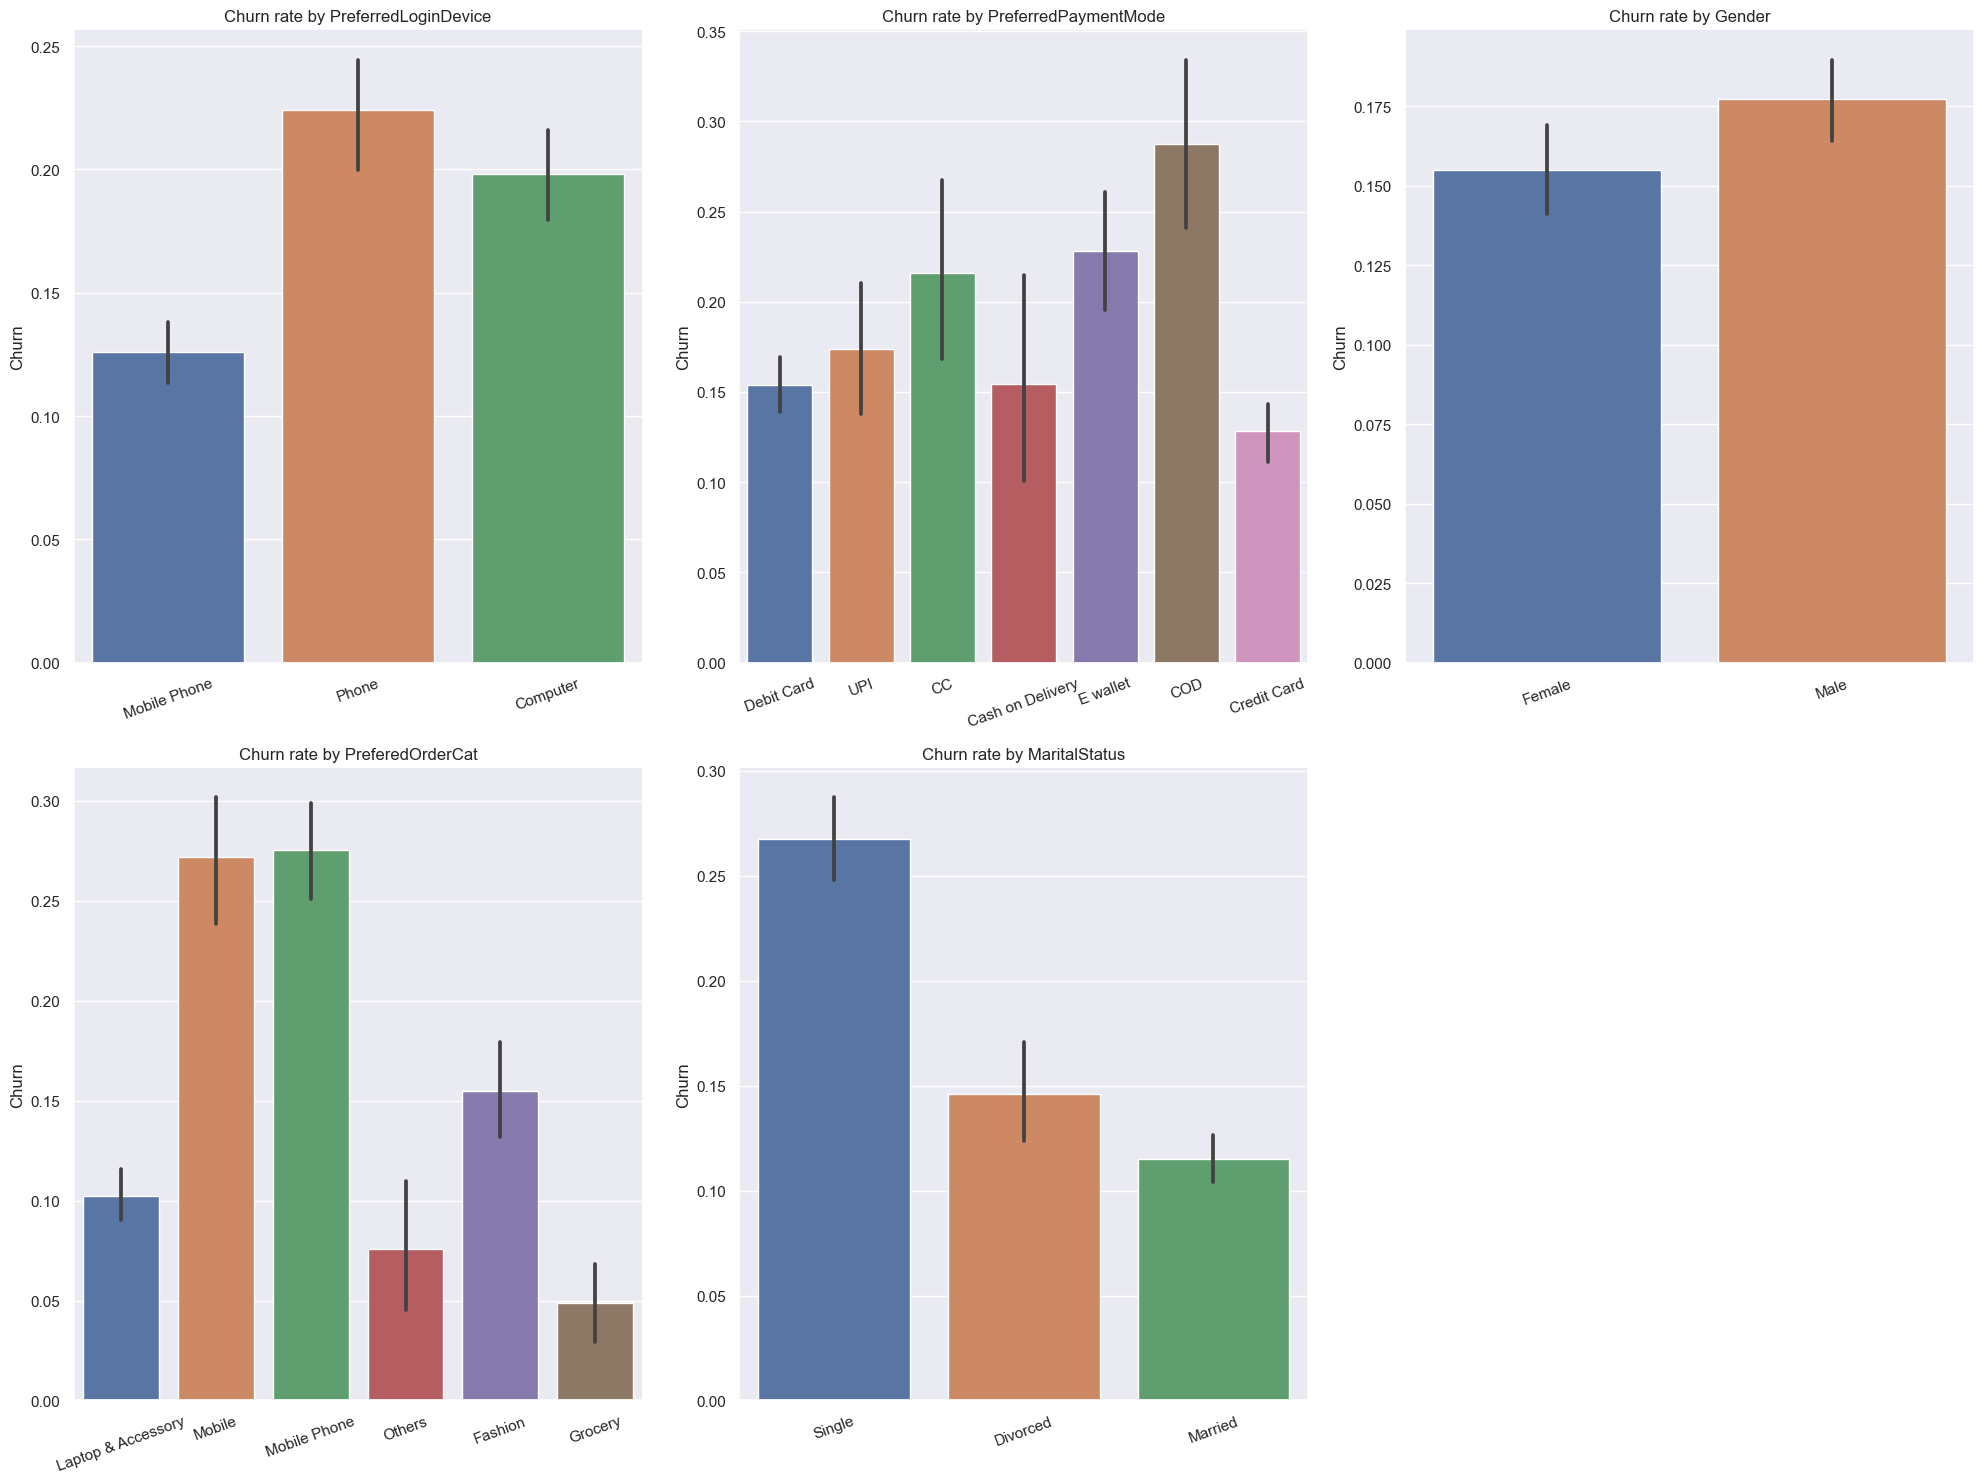

In [11]:
# Organize a list of categorical columns to visualize
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
                       'PreferedOrderCat', 'MaritalStatus']

# Create a figure with one subplot for each categorical column
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.delaxes(axes[1, 2])  # remove the last (empty) subplot
axes = axes.flatten()  # Flatten the axes array

# Loop over the categorical columns and create a bar plot for each one
for i, col in enumerate(categorical_columns):
    sns.barplot(x=col, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn rate by {col}')
    axes[i].set_xlabel("")  # Remove the x-axis label
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()

### Data Preprocessing

In [12]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [13]:
missing_values = df.isnull().sum().sum()
print(f"Missing values: {missing_values}/{len(df)}")

missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Missing rows: {missing_rows}/{len(df)}")

missing_rows_ratio = np.round(missing_rows/len(df)*100)
print("Missing rows ratio:", missing_rows_ratio, "%")

Missing values: 1856/5630
Missing rows: 1856/5630
Missing rows ratio: 33.0 %


33% is too much. But do we need all the columns? \
Let's separate the columns we need.

In [14]:
num_cols = ['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder',
            'CashbackAmount', 'NumberOfDeviceRegistered', 'SatisfactionScore']
# Categorical columns selected based on churn rate (visualization)
cat_cols = ["PreferredPaymentMode", "PreferedOrderCat", "MaritalStatus"]
data = df[num_cols + cat_cols]
data.isnull().sum()

Churn                         0
Tenure                      264
Complain                      0
DaySinceLastOrder           307
CashbackAmount                0
NumberOfDeviceRegistered      0
SatisfactionScore             0
PreferredPaymentMode          0
PreferedOrderCat              0
MaritalStatus                 0
dtype: int64

In [15]:
miss_cols = ['Tenure', 'DaySinceLastOrder']
miss_vals = data[miss_cols].isnull().sum().sum()
print(f"Missing values: {miss_vals}")
print(f"Missing values ratio: {miss_vals / len(data) * 100 :.1f} %")

Missing values: 571
Missing values ratio: 10.1 %


Since we have limited data, we decided to fill the missing values. Let's look at the data to determine how we can fill the missing values:

In [16]:
data[miss_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.0,3.0,7.0,46.0


In [17]:
data[miss_cols].sample(10)

,Tenure,DaySinceLastOrder
1555,0.0,8.0
4641,8.0,4.0
4928,14.0,6.0
5311,2.0,1.0
5084,9.0,3.0
4886,5.0,4.0
2224,30.0,9.0
1657,4.0,2.0
2770,6.0,1.0
4099,14.0,5.0


We fill `NaN` values with the `mean` values.

In [18]:
imputer = SimpleImputer(strategy='mean')
num_values = imputer.fit_transform(data[miss_cols])
# fill_data = pd.DataFrame(data=num_values, columns=miss_cols)
data.loc[:, miss_cols] = pd.DataFrame(data=num_values, columns=miss_cols)

C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_1020\1756027778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, miss_cols] = pd.DataFrame(data=num_values, columns=miss_cols)


In [19]:
data.isnull().sum()

Churn                       0
Tenure                      0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
NumberOfDeviceRegistered    0
SatisfactionScore           0
PreferredPaymentMode        0
PreferedOrderCat            0
MaritalStatus               0
dtype: int64

In [20]:
data

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,PreferredPaymentMode,PreferedOrderCat,MaritalStatus
0,1,4.000000,1,5.000000,159.93,3,2,Debit Card,Laptop & Accessory,Single
1,1,10.189899,1,0.000000,120.90,4,3,UPI,Mobile,Single
2,1,10.189899,1,3.000000,120.28,4,3,Debit Card,Mobile,Single
3,1,0.000000,0,3.000000,134.07,4,5,Debit Card,Laptop & Accessory,Single
4,1,0.000000,0,3.000000,129.60,3,5,CC,Mobile,Single
...,...,...,...,...,...,...,...,...,...,...
5625,0,10.000000,0,4.000000,150.71,2,1,Credit Card,Laptop & Accessory,Married
5626,0,13.000000,0,4.543491,224.91,5,5,Credit Card,Fashion,Married
5627,0,1.000000,1,4.000000,186.42,2,4,Debit Card,Laptop & Accessory,Married
5628,0,23.000000,0,9.000000,178.90,5,4,Credit Card,Laptop & Accessory,Married


**One-Hot Encoding**

In [21]:
data = pd.get_dummies(data)
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.000000,1,5.0,159.93,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,10.189899,1,0.0,120.90,4,3,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,10.189899,1,3.0,120.28,4,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0.000000,0,3.0,134.07,4,5,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0.000000,0,3.0,129.60,3,5,1,0,0,...,0,0,0,0,1,0,0,0,0,1


**Scaling**

In [22]:
scaler = MinMaxScaler()
data = pd.DataFrame(data=scaler.fit_transform(data), columns=data.columns,
                index=data.index)
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.065574,1.0,0.108696,0.492107,0.4,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.167048,1.0,0.000000,0.372011,0.6,0.50,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.167048,1.0,0.065217,0.370104,0.6,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,0.0,0.065217,0.412536,0.6,1.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.065217,0.398782,0.4,1.00,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Train & Test split**

In [23]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=10
)

The `stratify` parameter in `train_test_split()` function is used to ensure that the same proportion of target class labels are present in both the training and test sets.

In [24]:
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(4504, 22)
y_train.shape=(4504,)
X_test.shape=(1126, 22)
y_test.shape=(1126,)


### Machine Learning

#### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93       936
         1.0       0.79      0.44      0.56       190

    accuracy                           0.89      1126
   macro avg       0.84      0.71      0.75      1126
weighted avg       0.88      0.89      0.87      1126

Model Accuracy: 0.8854351687388987


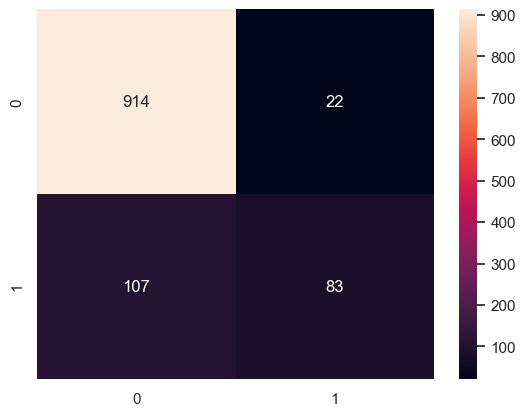

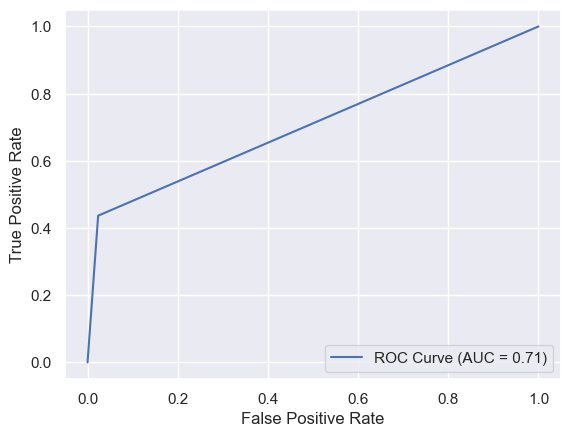

In [25]:
# Model Traning
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)

# Model Score
y_pred = LogReg_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='ROC Curve')
display.plot()
plt.show()

#### Decision Tree

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       936
         1.0       0.84      0.95      0.89       190

    accuracy                           0.96      1126
   macro avg       0.92      0.96      0.93      1126
weighted avg       0.96      0.96      0.96      1126

Model Accuracy: 0.9609236234458259


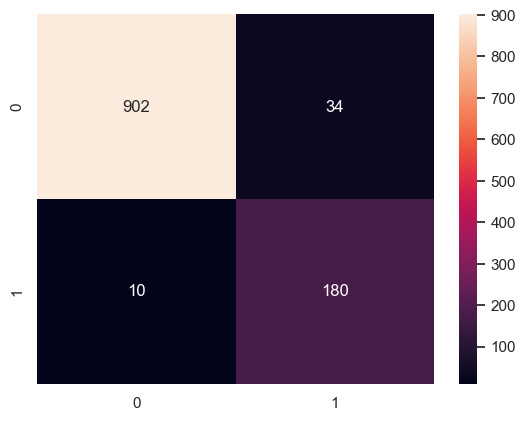

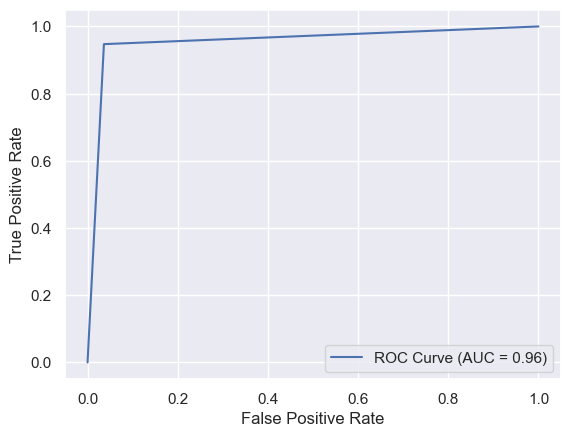

In [26]:
# Model Traning
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Model Score
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='ROC Curve')
display.plot()
plt.show()

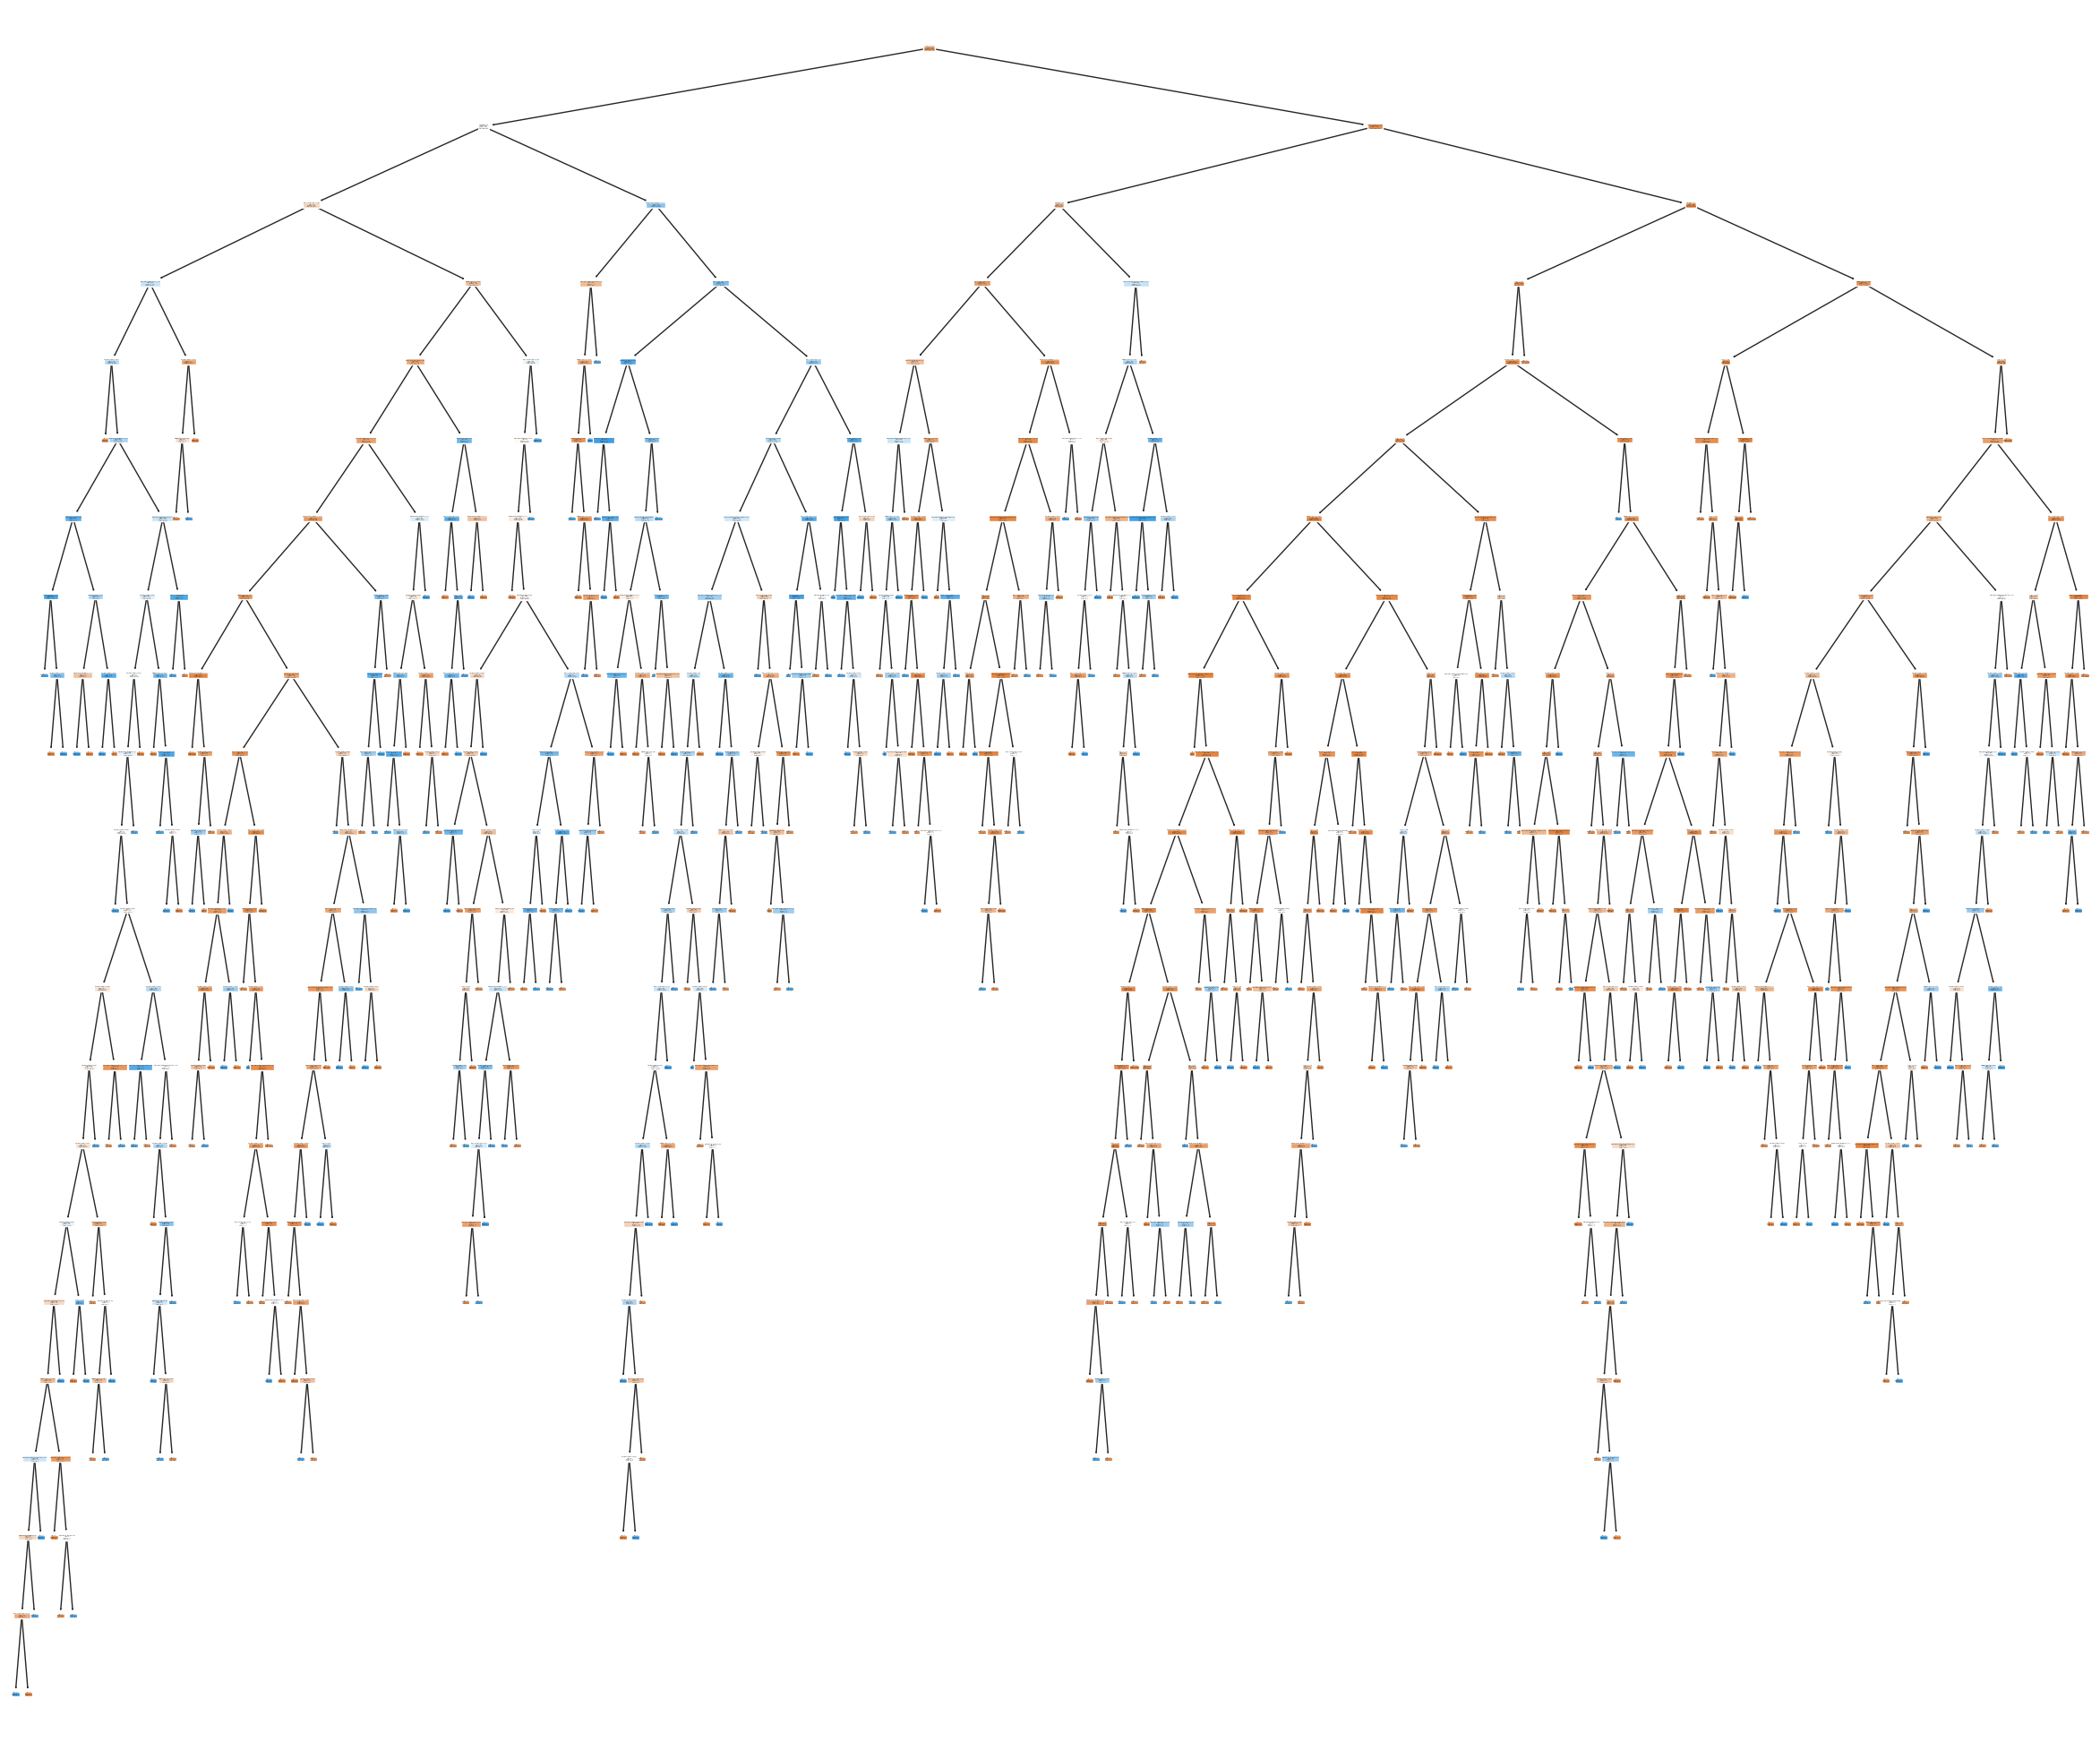

In [27]:
cols = data.drop("Churn", axis=1).columns

plt.figure(figsize=(30, 25))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

#### Random Forest

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       936
         1.0       0.87      0.79      0.83       190

    accuracy                           0.94      1126
   macro avg       0.91      0.88      0.90      1126
weighted avg       0.94      0.94      0.94      1126

Model Accuracy: 0.9440497335701599


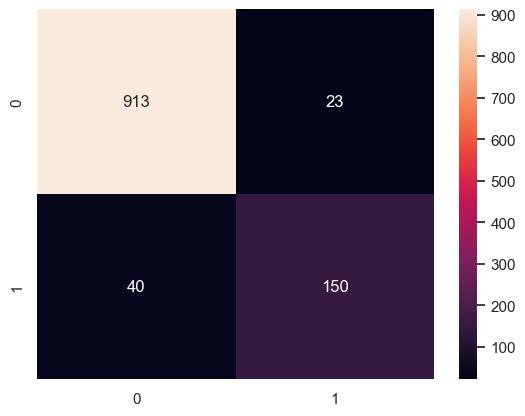

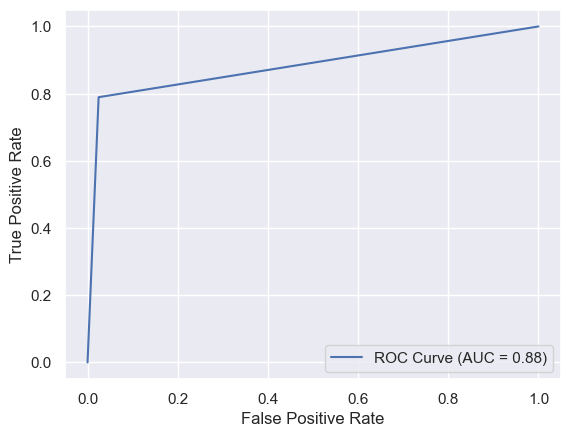

In [28]:
# Model Traning
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Model Score
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='ROC Curve')
display.plot()
plt.show()

**Support Vector Machines**
#### C-Support Vector Classification (C-SVC)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       936
         1.0       0.78      0.35      0.48       190

    accuracy                           0.87      1126
   macro avg       0.83      0.66      0.70      1126
weighted avg       0.86      0.87      0.85      1126

Model Accuracy: 0.8730017761989343


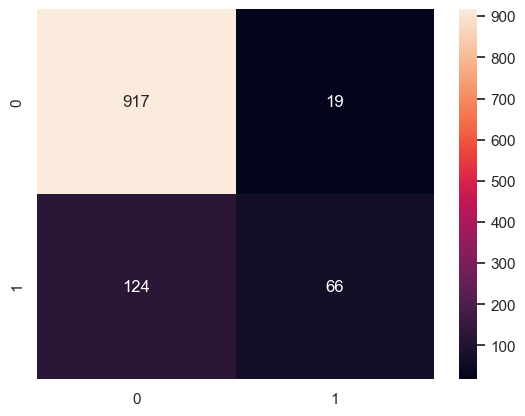

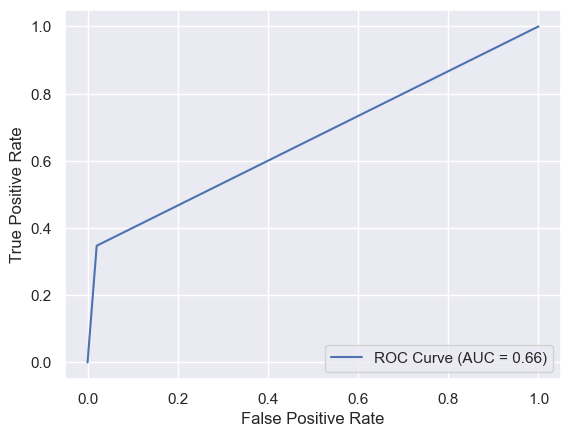

In [29]:
# Model Traning
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Model Score
y_pred = svc_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='ROC Curve')
display.plot()
plt.show()

#### XGBoost

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       936
         1.0       0.88      0.86      0.87       190

    accuracy                           0.96      1126
   macro avg       0.92      0.92      0.92      1126
weighted avg       0.96      0.96      0.96      1126

Model Accuracy: 0.955595026642984


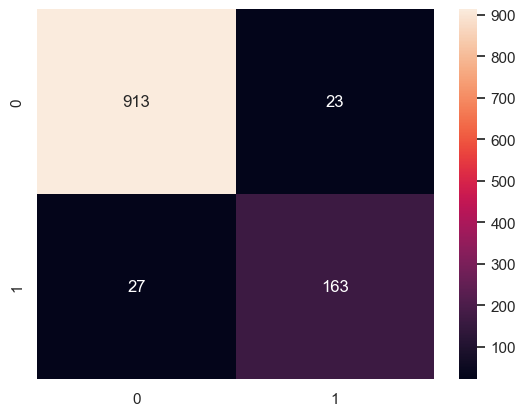

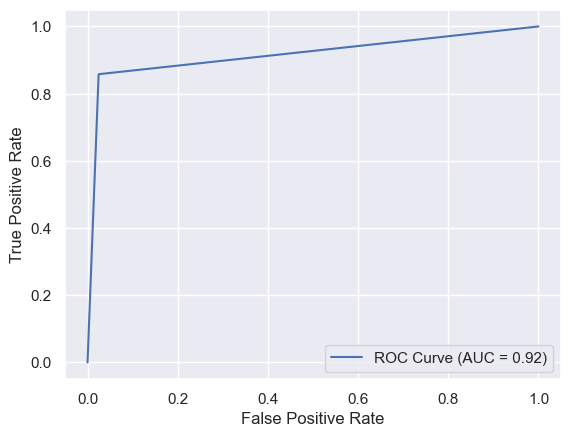

In [30]:
# Model Traning
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Model Score
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='ROC Curve')
display.plot()
plt.show()

---
**Conclusion:** The model with the best accuracy: `Decision Tree`, *accuracy:* `96%`